<p style="text-align:center">
        <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
</p>


### Analyse search terms on the e-commerce web server


##### In this assignment you will download the search term data set for the e-commerce web server and run analytic queries on it.


In [1]:
# Install spark
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 MB 1.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 29.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.4.4-py2.py3-none-any.whl size=311905466 sha256=72d57acaf4f791147e7fa0a5d510fe4c42f525a83f88a47de6b33387563d0645
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/4e/66/db/939eb1c49afb8a7fd2c4e393ad34e12b77db67bb4cc974c00e
Successfully built pyspark


In [2]:
# Importing libraries
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [ ]:
# Start session

In [3]:
spark = SparkSession.builder \
    .appName("Analyse search terms") \
    .getOrCreate()
sc = spark.sparkContext

print("Spark session started")
print("Spark version:", spark.version)


26/02/25 16:23:02 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


Spark session started
Spark version: 2.4.3


In [ ]:
# Download The search term dataset from the below url
# https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0321EN-SkillsNetwork/Bigdata%20and%20Spark/searchterms.csv

In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0321EN-SkillsNetwork/Bigdata%20and%20Spark/searchterms.csv

--2026-02-25 16:28:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0321EN-SkillsNetwork/Bigdata%20and%20Spark/searchterms.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 233457 (228K) [text/csv]
Saving to: ‘searchterms.csv.2’

searchterms.csv.2   100%[===================>] 227.99K  --.-KB/s    in 0.008s  

2026-02-25 16:28:01 (28.7 MB/s) - ‘searchterms.csv.2’ saved [233457/233457]



In [ ]:
# Load the csv into a spark dataframe

In [5]:
search_data = spark.read.csv("searchterms.csv", header=True, inferSchema=True)


In [6]:
# Print the number of rows and columns
rows = search_data.count()
cols = len(search_data.columns)

print("Number of rows:", rows)
print("Number of columns:", cols)


Number of rows: 10000
Number of columns: 4


In [7]:
# Print the top 5 rows
search_data.show(5)


+---+-----+----+--------------+
|day|month|year|    searchterm|
+---+-----+----+--------------+
| 12|   11|2021| mobile 6 inch|
| 12|   11|2021| mobile latest|
| 12|   11|2021|   tablet wifi|
| 12|   11|2021|laptop 14 inch|
| 12|   11|2021|     mobile 5g|
+---+-----+----+--------------+
only showing top 5 rows



In [9]:
# Find out the datatype of the column searchterm?
search_data.schema["searchterm"].dataType
# [col_type for col_name, col_type in search_data.dtypes if col_name == "searchterm"][0]
# [col[1] for col in search_data.dtypes if col[0] == "searchterm"][0]
# dict(search_data.dtypes)["searchterm"]
# search_data.dtypes[-1]
# search_data.dtypes


StringType

In [15]:
search_data.printSchema()


root
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- searchterm: string (nullable = true)



In [25]:
# How many times was the term `gaming laptop` searched?

# Option 1
# count_gaming = search_data.filter(search_data.searchterm == "gaming laptop").count()
# print("Number of searches for 'gaming laptop':", count_gaming)

# # Option 2
# from pyspark.sql.functions import lower

# # Option 3
# count_gaming = search_data.filter(lower(search_data.searchterm) == "gaming laptop").count()
# print(count_gaming)

# # Option 4: Python partial match
# search_data.filter(search_data.searchterm.contains("gaming laptop")).count()

# # ------------------PySpark SQL ----------------------------
search_data.createOrReplaceTempView("search_data")

# spark.sql("""
#     SELECT COUNT(*) AS gaming_laptop_count
#     FROM search_data
#     WHERE searchterm = 'gaming laptop'
# """).show()

# # Partial match
# spark.sql("""
#     SELECT COUNT(*) AS gaming_laptop_count
#     FROM search_data
#     WHERE searchterm LIKE '%gaming laptop%'
# """).show()

# Case‑insensitive SQL version
spark.sql("""
    SELECT COUNT(*) AS gaming_laptop_count
    FROM search_data
    WHERE lower(searchterm) = 'gaming laptop'
""").show()


+-------------------+
|gaming_laptop_count|
+-------------------+
|                499|
+-------------------+



In [ ]:
# Print the top 5 most frequently used search terms?

In [27]:
# # Option1
# spark.sql("""
#     SELECT searchterm, COUNT(*) AS frequency
#     FROM search_data
#     GROUP BY searchterm
#     ORDER BY frequency DESC
#     LIMIT 5
# """).show()

# Option 2: Case‑insensitive version

spark.sql("""
    SELECT lower(searchterm) AS searchterm, COUNT(*) AS frequency
    FROM search_data
    GROUP BY lower(searchterm)
    ORDER BY frequency DESC
    LIMIT 5
""").show()


[Stage 27:====================================================> (195 + 5) / 200]

+-------------+---------+
|   searchterm|frequency|
+-------------+---------+
|mobile 6 inch|     2312|
|    mobile 5g|     2301|
|mobile latest|     1327|
|       laptop|      935|
|  tablet wifi|      896|
+-------------+---------+



In [28]:
# # Python / PySpark way
from pyspark.sql.functions import col

top5 = (search_data
        .groupBy("searchterm")
        .count()
        .orderBy(col("count").desc())
        .limit(5))

top5.show()


[Stage 30:================================================>     (178 + 9) / 200]

+-------------+-----+
|   searchterm|count|
+-------------+-----+
|mobile 6 inch| 2312|
|    mobile 5g| 2301|
|mobile latest| 1327|
|       laptop|  935|
|  tablet wifi|  896|
+-------------+-----+



In [29]:
# The pretrained sales forecasting model is available at  the below url
# https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0321EN-SkillsNetwork/Bigdata%20and%20Spark/model.tar.gz

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0321EN-SkillsNetwork/Bigdata%20and%20Spark/model.tar.gz

--2026-02-25 17:16:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DB0321EN-SkillsNetwork/Bigdata%20and%20Spark/model.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1490 (1.5K) [application/x-tar]
Saving to: ‘model.tar.gz.1’

model.tar.gz.1      100%[===================>]   1.46K  --.-KB/s    in 0s      

2026-02-25 17:16:09 (14.5 MB/s) - ‘model.tar.gz.1’ saved [1490/1490]



In [30]:
# Load the sales forecast model.
# The -x extracts, -v is verbose, -z is for gunzip, -f specifies the file
!tar -xvzf model.tar.gz

sales_prediction.model/
sales_prediction.model/metadata/
sales_prediction.model/metadata/part-00000
sales_prediction.model/metadata/.part-00000.crc
sales_prediction.model/metadata/_SUCCESS
sales_prediction.model/metadata/._SUCCESS.crc
sales_prediction.model/data/
sales_prediction.model/data/part-00000-1db9fe2f-4d93-4b1f-966b-3b09e72d664e-c000.snappy.parquet
sales_prediction.model/data/_SUCCESS
sales_prediction.model/data/.part-00000-1db9fe2f-4d93-4b1f-966b-3b09e72d664e-c000.snappy.parquet.crc
sales_prediction.model/data/._SUCCESS.crc


In [35]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegressionModel

# Load the model using the folder name shown in your image
model = LinearRegressionModel.load('sales_prediction.model')

# Verify it loaded by printing the model type
print(model)

LinearRegression_6d5736f3dbe7


In [ ]:
# # This shows the names of the columns the model expects
# print("Features Column:", model.getFeaturesCol())
# print("Label Column:", model.getLabelCol())

In [37]:
# This shows the names of the columns the model expects
# This prints all parameters and their values
for param in model.extractParamMap():
    print(f"{param.name}: {model.extractParamMap()[param]}")

aggregationDepth: 2
elasticNetParam: 0.0
epsilon: 1.35
fitIntercept: True
loss: squaredError
predictionCol: prediction
solver: auto
standardization: True
tol: 1e-06
featuresCol: features
labelCol: sales
maxIter: 100
regParam: 0.1


In [38]:
model.params

[Param(parent='LinearRegression_6d5736f3dbe7', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2)'),
 Param(parent='LinearRegression_6d5736f3dbe7', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty'),
 Param(parent='LinearRegression_6d5736f3dbe7', name='epsilon', doc='The shape parameter to control the amount of robustness. Must be > 1.0.'),
 Param(parent='LinearRegression_6d5736f3dbe7', name='featuresCol', doc='features column name'),
 Param(parent='LinearRegression_6d5736f3dbe7', name='fitIntercept', doc='whether to fit an intercept term'),
 Param(parent='LinearRegression_6d5736f3dbe7', name='labelCol', doc='label column name'),
 Param(parent='LinearRegression_6d5736f3dbe7', name='loss', doc='The loss function to be optimized. Supported options: squaredError, huber. (Default squaredError)'),
 Param(parent='LinearRegression_6d5736f3dbe7', name='maxIter', doc

In [39]:
model.featuresCol

Param(parent='LinearRegression_6d5736f3dbe7', name='featuresCol', doc='features column name')

In [ ]:
# Using the sales forecast model, predict the sales for the year of 2023.


In [40]:
# from pyspark.ml.feature import VectorAssembler

# 1. Prepare the input data
# We use 2023 as the input and 0 as a placeholder for the 'sales' label
data_2023 = [[2023, 0]]
columns = ["year", "sales"]
df_2023 = spark.createDataFrame(data_2023, columns)

# 2. Configure the VectorAssembler
# inputCols matches our 'year' column
# outputCol matches the model's 'featuresCol' (which is "features")
assembler = VectorAssembler(inputCols=["year"], outputCol="features")
processed_data = assembler.transform(df_2023)

# 3. Generate the Prediction
# This uses the 'model' variable you loaded earlier
predictions = model.transform(processed_data)

# 4. Display the result
print("Sales Forecast for 2023:")
predictions.select("year", "prediction").show()

Sales Forecast for 2023:


+----+------------------+
|year|        prediction|
+----+------------------+
|2023|175.16564294006457|
+----+------------------+



26/02/25 18:12:27 WARN netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
26/02/25 18:12:27 WARN netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [41]:
# from pyspark.ml.feature import VectorAssembler

def predict_sales_2023():
    # 1. Create data for the year 2023
    data = [[2023, 0]]
    columns = ["year", "sales"]
    df = spark.createDataFrame(data, columns)
    
    # 2. Assemble features
    assembler = VectorAssembler(inputCols=["year"], outputCol="features")
    transformed_df = assembler.transform(df)
    
    # 3. Use the 'model' variable we just loaded
    predictions = model.transform(transformed_df)
    predictions.select('prediction').show()

# Run the prediction
predict_sales_2023()

+------------------+
|        prediction|
+------------------+
|175.16564294006457|
+------------------+



In [42]:
# Dynamic Function
def predict_sales(target_year):
    data = [[target_year, 0]]
    columns = ["year", "sales"]
    df = spark.createDataFrame(data, columns)
    
    assembler = VectorAssembler(inputCols=["year"], outputCol="features")
    transformed_df = assembler.transform(df)
    
    predictions = model.transform(transformed_df)
    predictions.select('year', 'prediction').show()

# Now you can forecast any year!
predict_sales(2024)
predict_sales(2025)

+----+-----------------+
|year|       prediction|
+----+-----------------+
|2024|181.6882108013524|
+----+-----------------+

+----+------------------+
|year|        prediction|
+----+------------------+
|2025|188.21077866264204|
+----+------------------+



Graph saved as sales_trend.png


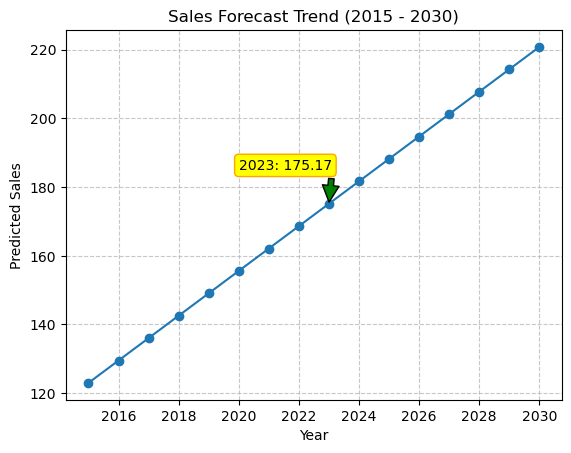

In [55]:
import matplotlib.pyplot as plt

def plot_sales_trend(start_year, end_year):
    # 1. Create a range of years
    years = list(range(start_year, end_year + 1))
    
    # 2. Create Spark DataFrame for the range
    # We provide a placeholder 0 for the 'sales' column
    data = [[y, 0] for y in years]
    columns = ["year", "sales"]
    df_range = spark.createDataFrame(data, columns)
    
    # 3. Assemble features (matching the model's requirements)
    assembler = VectorAssembler(inputCols=["year"], outputCol="features")
    transformed_df = assembler.transform(df_range)
    
    # 4. Predict using the loaded model
    predictions = model.transform(transformed_df)
    
    # 5. Convert to Pandas for local plotting
    # .toPandas() is safe here because we only have a few rows
    pd_df = predictions.select("year", "prediction").toPandas()
    
    # 6. Plotting logic
    plt.plot(pd_df['year'], pd_df['prediction'], marker='o', linestyle='-', color='tab:blue')
    plt.title(f'Sales Forecast Trend ({start_year} - {end_year})')
    plt.xlabel('Year')
    plt.ylabel('Predicted Sales')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add a marker for the 2023 prediction you just found
    val_2023 = pd_df[pd_df['year'] == 2023]['prediction'].values[0]
    plt.annotate(f'2023: {val_2023:.2f}', 
                 xy=(2023, val_2023), 
                 xytext=(2020, val_2023 + 10),
                 arrowprops=dict(facecolor='green', shrink=0.05),
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="orange", lw=1) # Adds a box around text
                )
    
    plt.savefig('sales_trend.png')
    print("Graph saved as sales_trend.png")

# Generate the plot
plot_sales_trend(2015, 2030)